<a href="https://colab.research.google.com/github/sonsiho/PythonForEngineer/blob/main/Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import thư viện hổ trợ

In [3]:
# Import thư viện hổ trợ

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Thư viện vẽ đồ thị

import time # module xử lý thời gian
import math # module xử lý các phép toán
import datetime # module xử lý ngày tháng


# Import widgets - thư viện xử lý UI
from ipywidgets import widgets, interactive, interact
import ipywidgets as widgets
from IPython.display import display

from math import log, floor
from sklearn.neighbors import KDTree

# Import thư viện được sử dụng để tạo biểu đồ trực quan hóa cho tập dữ liệu hổ trợ cho matplotlib.pyplot
import seaborn as sns
sns.set_style('whitegrid')

# Thư viện vẽ đồ thị
import plotly.express as px

# Go cung cấp nhiều kiểu vẽ biễu đồ phân tán
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import pywt
from statsmodels.robust import mad

import scipy
import statsmodels
from scipy import signal

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.stattools import adfuller

# Import intertools - Module hổ trợ xử lý nâng cao For Loop và Array
import itertools 
from itertools import cycle
plt.style.use('seaborn')
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

# Kiểm tra tập dữ liệu đầu vào trên máy đã có hay chưa. 
# Dùng colab google thì không cần đoạn này
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# Load dữ liệu từ tập data input file csv

In [5]:
# import Pandas hổ trợ xử lý đọc file và truy xuất dữ liệu
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Đọc dữ liệu từ bộ data input:
# calendar_df.csv : Chứa thông tin về ngày sản phẩm được bán và cũng chứa thông tin về các ngày lễ và các dịp đặc biệt.
# train_sales_df: Chứa dữ liệu lịch sử bán hàng mỗi ngày cho mỗi sản phẩm của từng cửa hàng và bộ phận bán hàng trong 1900 ngày
# sell_prices_df : Dữ liệu giá bán của các mặt hàng được bán trên mỗi cửa hàng theo từng ngày

# Tập dữ liệu đã được resized
sell_prices_df = pd.read_csv('https://cdn.smas.edu.vn/Assets/M5/Resized/kaggle/input/m5-forecasting-accuracy/sell_prices.csv')
train_sales_df = pd.read_csv('https://cdn.smas.edu.vn/Assets/M5/Resized/kaggle/input/m5-forecasting-accuracy/sales_train_validation.csv')
calendar_df = pd.read_csv('https://cdn.smas.edu.vn/Assets/M5/Resized/kaggle/input/m5-forecasting-accuracy/calendar.csv')
sales_train_evaluation = pd.read_csv('https://cdn.smas.edu.vn/Assets/M5/Resized/kaggle/input/m5-forecasting-accuracy/sales_train_evaluation.csv')
# Tập dữ liệu full
#sell_prices_df = pd.read_csv('https://cdn.smas.edu.vn/Assets/M5/Full/kaggle/input/m5-forecasting-accuracy/sell_prices.csv')
#train_sales_df = pd.read_csv('https://cdn.smas.edu.vn/Assets/M5/Full/kaggle/input/m5-forecasting-accuracy/sales_train_validation.csv')
#calendar_df = pd.read_csv('https://cdn.smas.edu.vn/Assets/M5/Full/kaggle/input/m5-forecasting-accuracy/calendar.csv')

# file mẫu (file kết quả sau dự báo) để nộp kết quả dự báo doanh số bán hàng 28 ngày tới.
submission_file = pd.read_csv('https://cdn.smas.edu.vn/Assets/M5/Resized/kaggle/input/m5-forecasting-accuracy/sample_submission.csv')

# sales_train_evaluation = pd.read_csv('https://cdn.smas.edu.vn/Assets/M5/Full/kaggle/input/m5-forecasting-accuracy/sales_train_evaluation.csv')

# show thông tin của các dataset
sell_prices_df.info()
calendar_df.info()
train_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302573 entries, 0 to 302572
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   store_id    302573 non-null  object 
 1   item_id     302573 non-null  object 
 2   wm_yr_wk    302573 non-null  int64  
 3   sell_price  302573 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 9.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   ev

In [6]:
# Test dọc dữ liệu. Lấy 3 hàng đầu tiên trong file csv -> xem tập dữ liệu đang được cấu trúc ntn
train_sales_df.head(3)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1


# Tiền xử lý chuẩn hóa dữ liệu

## Xử lý total_sales_all_days

In [7]:
# Lấy danh sách list các cột có tên cột bắt đầu bằng 'd_'
d_cols = [c for c in train_sales_df.columns if 'd_' in c]

# thêm 1 cột total_sales_all_days chứa thông tin tổng cộng các mặt hàng đã được bán từ ngày 1 tới ngày 1913
# train_sales_df[d_cols] : where tập dữ liệu theo các cột đã chọn
# sum(axis = 1) => axis = 1 : sum theo hàng. axis = 0: sum theo cột
train_sales_df['total_sales_all_days'] = train_sales_df[d_cols].sum(axis = 1)

train_sales_df

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,total_sales_all_days
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,3,0,1,1,1,3,0,1,1,600
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,1,0,0,0,0,493
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,2,1,1,1,0,1,1,1,288
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,5,4,1,0,1,3,7,2,3288
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,1,1,2,2,2,4,1849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3070,HOUSEHOLD_2_238_CA_1_validation,HOUSEHOLD_2_238,HOUSEHOLD_2,HOUSEHOLD,CA_1,CA,0,0,0,0,...,1,1,0,0,0,0,1,2,1,641
3071,HOUSEHOLD_2_239_CA_1_validation,HOUSEHOLD_2_239,HOUSEHOLD_2,HOUSEHOLD,CA_1,CA,1,3,0,2,...,0,3,1,2,1,1,1,1,2,2710
3072,HOUSEHOLD_2_240_CA_1_validation,HOUSEHOLD_2_240,HOUSEHOLD_2,HOUSEHOLD,CA_1,CA,0,1,0,0,...,0,0,0,1,4,0,0,0,1,1003
3073,HOUSEHOLD_2_241_CA_1_validation,HOUSEHOLD_2_241,HOUSEHOLD_2,HOUSEHOLD,CA_1,CA,1,2,2,1,...,0,0,0,0,0,0,0,0,0,966


## Xử lý avg_sales_all_days

In [8]:
# thêm 1 cột avg_sales_all_days chứa thông tin tổng trung bình các mặt hàng đã được bán từ ngày 1 tới ngày 1913
# mean(axis = 1) :  trung bình các cột từ d1 -> d_1913
train_sales_df['avg_sales_all_days'] = train_sales_df[d_cols].mean(axis = 1)

train_sales_df

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,total_sales_all_days,avg_sales_all_days
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,1,1,3,0,1,1,600,0.313643
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,1,0,0,0,0,493,0.257710
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,1,0,1,1,1,288,0.150549
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,5,4,1,0,1,3,7,2,3288,1.718766
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,1,1,2,2,2,4,1849,0.966545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3070,HOUSEHOLD_2_238_CA_1_validation,HOUSEHOLD_2_238,HOUSEHOLD_2,HOUSEHOLD,CA_1,CA,0,0,0,0,...,1,0,0,0,0,1,2,1,641,0.335076
3071,HOUSEHOLD_2_239_CA_1_validation,HOUSEHOLD_2_239,HOUSEHOLD_2,HOUSEHOLD,CA_1,CA,1,3,0,2,...,3,1,2,1,1,1,1,2,2710,1.416623
3072,HOUSEHOLD_2_240_CA_1_validation,HOUSEHOLD_2_240,HOUSEHOLD_2,HOUSEHOLD,CA_1,CA,0,1,0,0,...,0,0,1,4,0,0,0,1,1003,0.524307
3073,HOUSEHOLD_2_241_CA_1_validation,HOUSEHOLD_2_241,HOUSEHOLD_2,HOUSEHOLD,CA_1,CA,1,2,2,1,...,0,0,0,0,0,0,0,0,966,0.504966


## Xử lý median_sales_all_days

In [9]:
# thêm 1 cột median_sales_all_days chứa thông tin trung vị các mặt hàng đã được bán từ ngày 1 tới ngày 1913
# Vd 1: [2, 5, 3, 1, 7] sort asc -> [1, 2, 3, 5, 7] -> median = 3;
# Vd 2: [1, 2, 5, 7, 8, 9] -> median = 5 + 7 / 2 = 6;
train_sales_df['median_sales_all_days'] = train_sales_df[d_cols].median(axis = 1)

train_sales_df

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,total_sales_all_days,avg_sales_all_days,median_sales_all_days
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,1,3,0,1,1,600,0.313643,0.0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,1,0,0,0,0,493,0.257710,0.0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,1,0,1,1,1,288,0.150549,0.0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,4,1,0,1,3,7,2,3288,1.718766,1.0
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,1,2,2,2,4,1849,0.966545,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3070,HOUSEHOLD_2_238_CA_1_validation,HOUSEHOLD_2_238,HOUSEHOLD_2,HOUSEHOLD,CA_1,CA,0,0,0,0,...,0,0,0,0,1,2,1,641,0.335076,0.0
3071,HOUSEHOLD_2_239_CA_1_validation,HOUSEHOLD_2_239,HOUSEHOLD_2,HOUSEHOLD,CA_1,CA,1,3,0,2,...,1,2,1,1,1,1,2,2710,1.416623,1.0
3072,HOUSEHOLD_2_240_CA_1_validation,HOUSEHOLD_2_240,HOUSEHOLD_2,HOUSEHOLD,CA_1,CA,0,1,0,0,...,0,1,4,0,0,0,1,1003,0.524307,0.0
3073,HOUSEHOLD_2_241_CA_1_validation,HOUSEHOLD_2_241,HOUSEHOLD_2,HOUSEHOLD,CA_1,CA,1,2,2,1,...,0,0,0,0,0,0,0,966,0.504966,0.0


# EDA (Phân tích và khám phá dữ liệu)

## Biểu đồ thống kê số lượng sản phẩm bán ra theo danh mục

In [159]:
# Thông tin số lượng các loại sản phẩm theo danh mục
df_by_cat = train_sales_df.groupby(['cat_id'])['id'].count().reset_index(name='total_entries')

df_by_cat

# thư viện vẽ Chart
import plotly.express as px

# px.pie : Chart dạng pie
# px.pie(data_frame=None, names=None, values=None, color_discrete_sequence=None, title=None, width=None, height=None)
# data_frame : pandas.core.frame.DataFrame - Dataframe mảng nhiều chiều của Pandas
# names : Tên của loại dữ liệu cần show
# values : Giá trị tương ứng với names
# color_discrete_sequence :  chuỗi các mã màu được define sẵn trong plotly. Ở đây dùng loại RdBu
# width : Chiều rộng (interger - pixels)
# height : Chiều cao (interger - pixels)
# title : Tên biểu đồ
fig = px.pie(df_by_cat, values='total_entries', names='cat_id', 
            color_discrete_sequence=px.colors.sequential.RdBu,
            width = 750, height=450, title = 'Biểu đồ thống kê số lượng sản phẩm bán ra theo danh mục')

# hiển thị biểu đồ lên màn hình
fig.show()

## Biểu đồ thống kê số lượng sản phẩm bán ra theo địa điểm các Bang của Mỹ

In [12]:
# Thông tin số lượng các loại sản phẩm được bán theo địa điểm
# CA : bang Cali
# TX : bang Texas
# Wi : bang Wisconsin
df_by_state = train_sales_df.groupby(['state_id'])['total_sales_all_days'].sum().reset_index()

df_by_state

#Biểu đồ thống kê số lượng sản phẩm bán ra theo địa điểm các Bang của Mỹ
fig = px.pie(df_by_state, values='total_sales_all_days', names='state_id', 
            color_discrete_sequence=px.colors.sequential.Aggrnyl,
            width = 750, height=450, title = 'Biểu đồ thống kê số lượng sản phẩm bán ra theo địa điểm các Bang của Mỹ')
fig.show()

,cat_id,state_id,total_sales_all_days
0,FOODS,CA,1482529
1,HOBBIES,CA,1133742
2,HOBBIES,TX,626638
3,HOBBIES,WI,758746
4,HOUSEHOLD,CA,666112


## Biểu đô thống kê theo danh mục và bang

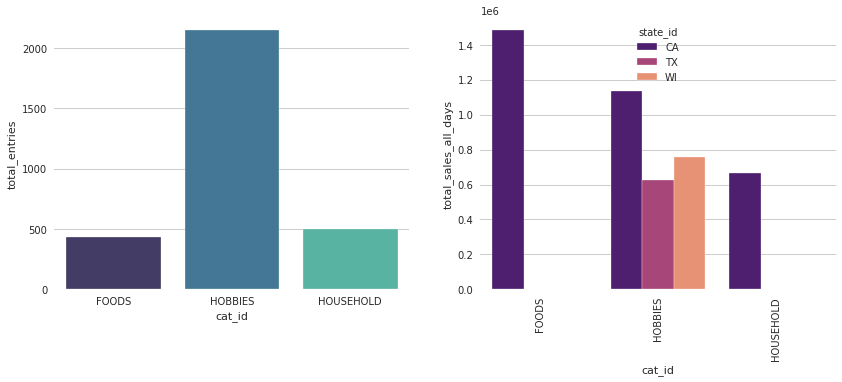

In [13]:
df_by_cat_and_state = train_sales_df.groupby(['cat_id', 'state_id'])['total_sales_all_days'].sum().reset_index()

import seaborn as sns
import matplotlib.pyplot as plt # Thư viện vẽ đồ thị

# set style cho seaborn là whitegrid => không set mặc định là darkgrid
sns.set_style('whitegrid')

# set style cho 2 trục của biểu đồ là ticks => không set mặc định là darkgrid
sns.axes_style(style='ticks')

# plt.subplots : Nhiều biểu đồ trong 1 figure. Phương thức này lấy hai đối số nrows và ncols làm số lượng hàng và số cột tương ứng
# Vd : plt.subplots(1,2,..) : 1 hàng 2 cột
# figsize=(14,5) : Phương thức này tạo ra hai đối tượng: figure và axes mà chúng ta lưu trữ trong các biến fig và ax có thể được sử dụng để thay đổi các thuộc tính mức figure và axes tương ứng
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

# Hàm barplot() hoạt động trên một tập dữ liệu đầy đủ và mô tả một ước lượng (mặc định là sử dụng trung bình cộng - mean).
sns.barplot(x = 'cat_id', y='total_entries', data=df_by_cat, 
            palette='mako', ax=ax1)
sns.barplot(x = 'cat_id', y='total_sales_all_days', hue='state_id', data=df_by_cat_and_state, 
            palette='magma', ax=ax2)

plt.xticks(rotation=90)
plt.show()

,state_id,cat_id,num_sales_by_category
0,CA,FOODS,429
1,CA,HOBBIES,817
2,CA,HOUSEHOLD,501
3,TX,HOBBIES,661
4,WI,HOBBIES,667


## Biểu đồ số lượng mặt hàng bán ra theo Danh mục và Bang

In [14]:
# Thông tin số lượng mặt hàng bán ra theo Danh mục và Bang
df_count_by_cat_and_state = train_sales_df.groupby(['state_id', 'cat_id'])['id'].count().reset_index(name='num_sales_by_category')

# Biểu đồ số lượng mặt hàng bán ra theo Danh mục và Bang
fig = px.bar(df_count_by_cat_and_state, x="state_id", y="num_sales_by_category", 
             color="cat_id", title="Biểu đồ số lượng mặt hàng bán ra theo Danh mục và Bang")
fig.show()

## Biểu đồ phân phối số liệu bán hàng trên mỗi của hàng và trên mỗi Bang

In [18]:
# train_sales_df.columns[6:] : lấy sổ cột bắt đầu từ index = 6 tới hết
df_by_dept_store_state_cat = train_sales_df.groupby(['dept_id', 'store_id', 'state_id', 'cat_id'])[train_sales_df.columns[6:]].sum().reset_index().sort_values('total_sales_all_days', ascending=False)

# Go cung cấp nhiều kiểu vẽ biễu đồ phân tán
import plotly.graph_objects as go

x_dept = df_by_dept_store_state_cat['dept_id']
x_store = df_by_dept_store_state_cat['store_id']

# define hàm vẽ biểu đồ 
def items_sold_per_days(x_spec,title_text, title):
    
    '''
    Vẽ biểu đồ với dropdown menus dựa vào số lượng ngày chỉ định

    inputs: x_spec (Danh mục các cột nằm trên trục ngang), 
    title_text(Tên dropdown), 
    title (Tên biểu đồ)   
    '''
    
    # khai báo số cột cần tính toán
    cols = ['d_1', 'd_50', 'd_300', 'd_500', 'd_700', 'd_900', 'd_1100', 'd_1500', 'd_1700',
        'total_sales_all_days', 'median_sales_all_days']

    buttons1 = [dict(method = "restyle",
                 args = [{'x': [x_spec, 'undefined'],
                          'y': [df_by_dept_store_state_cat[cols[k]], 'undefined'],
                          'visible':[True, False]}], 
                 label = cols[k])   for k in range(0, len(cols))]

    fig = go.Figure()
    fig.add_trace(go.Bar(x=x_spec, y = df_by_dept_store_state_cat['d_1'], name='Dept.Sales on day2',
                     marker_color='Crimson'))

    # cập nhật lại layout của fig
    fig.update_layout(title_text= title_text,
                  title_x= 0.4, width=750, height=450, 
                  margin=dict(t=100, b=20, l=0, r=0),
                  autosize = False,
                  updatemenus=[dict(active=0,
                                    buttons=buttons1,
                                    x=0.08,
                                    y=1.13,
                                    xanchor='left',
                                    yanchor='top')
                              ]); 

    fig.add_annotation( x=0.00,  y=1.13, showarrow=False, xref='paper', yref='paper', xanchor='left',
                   text="Với <br>"+str(title));
    fig.show()

items_sold_per_days(df_by_dept_store_state_cat['store_id'], 'Số lượng bán ra trên mỗi cửa hàng', 'Cửa hàng')
items_sold_per_days(df_by_dept_store_state_cat['state_id'], "Số lượng bán ra trên mỗi bang", 'Bang')

## Tìm mặt hàng được bán ra nhiều nhất

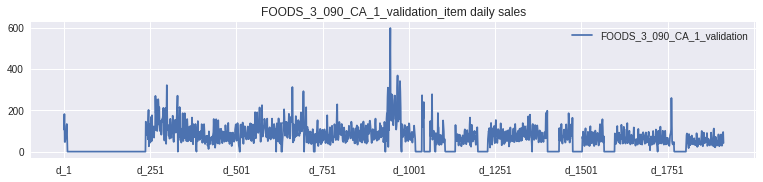

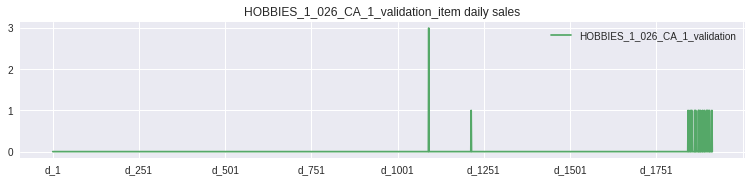

In [15]:
train_sales_df.groupby(['id'])['total_sales_all_days'].sum().sort_values(ascending=False)

# Import intertools - Module hổ trợ xử lý nâng cao For Loop và Array
import itertools 
from itertools import cycle
plt.style.use('seaborn')
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

def plot_dailysales(spec_id):
    """
    plots the behavior of dailysales of specific ids i.e. spec_id
    
    input: spec_id
    returns : number of sales plotted across number of days 
    """
    train_sales_df.loc[train_sales_df['id'] == spec_id].set_index('id')[d_cols]\
                .T\
                .plot(figsize = (13,2.5),title =  str(spec_id)+"_item daily sales",color = next(color_cycle))
    plt.legend()
    plt.show()

plot_dailysales('FOODS_3_090_CA_1_validation') 
plot_dailysales('HOBBIES_1_026_CA_1_validation')

## Mặt hàng được bán ra nhiều nhất trên mỗi danh mục

The 3 item_ids outselling most in FOODS category are: ['FOODS_3_090_CA_1_validation', 'FOODS_3_120_CA_1_validation', 'FOODS_3_080_CA_1_validation']
The 3 item_ids outselling most in HOUSEHOLDS category are: ['HOUSEHOLD_1_118_CA_1_validation', 'HOUSEHOLD_1_110_CA_1_validation', 'HOUSEHOLD_1_151_CA_1_validation']
The 3 item_ids outselling most in HOBBIES category are: ['HOBBIES_1_348_CA_1_validation', 'HOBBIES_1_371_CA_1_validation', 'HOBBIES_1_268_CA_1_validation']


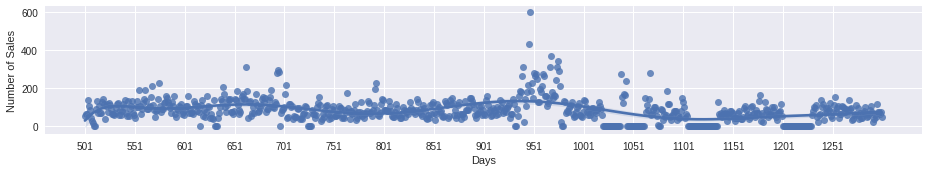

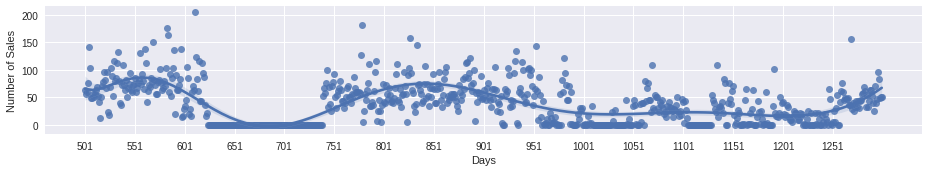

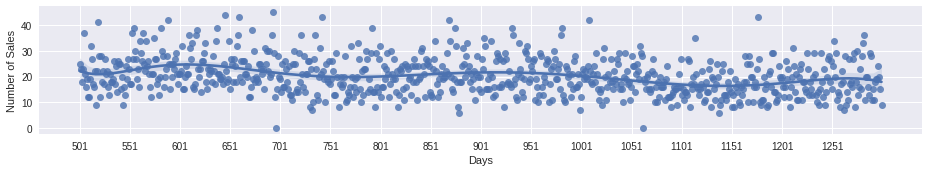

In [16]:
df_agg = pd.DataFrame(train_sales_df.groupby(['id', 'cat_id', 'store_id'])['total_sales_all_days'].sum().sort_values(ascending=False))
df_agg = df_agg.reset_index()
df_agg.head(3)

print("The 3 item_ids outselling most in FOODS category are: {}".format(list(df_agg.loc[df_agg['cat_id'] == 'FOODS']['id'][:3])))
print("The 3 item_ids outselling most in HOUSEHOLDS category are: {}".format(list(df_agg.loc[df_agg['cat_id'] == 'HOUSEHOLD']['id'][:3])))
print("The 3 item_ids outselling most in HOBBIES category are: {}".format(list(df_agg.loc[df_agg['cat_id'] == 'HOBBIES']['id'][:3])))

#fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 7))

def plot_sample_sales(spec_id, sm_start, sm_end, samples_pick=50):
    """
    plots sample sales data with selection point and ending point specified, along with
    samples_pick point that specifies the samples picked after specified intervals
    
    input: spec_id (item_id or id), sm_start (sample_start), sm_end(sample_end),
    samples_pick (samples picked after how many intervals)
    
    returns: outputs a graph of sample points plotted against daily sales data d_1 to d_1913
    """
    fig, ax1 = plt.subplots(figsize=(13, 2.5))
    
    x1 = list(train_sales_df[train_sales_df['id'] == spec_id][d_cols]\
              .columns)[sm_start:sm_end]
    y1 = list(train_sales_df[train_sales_df['id'] == spec_id][d_cols]\
              .values.flatten())[sm_start:sm_end]
    
    #this conversion for regplot only
    x1 = [x.replace("d_", "") for x in x1]
    x1 = [int(x) for x in x1]
    
    #sns.lineplot(x=x1, y=y1, ax=ax1)
    sns.regplot(x=x1, y=y1, order=10, ax=ax1)
    ax1.set_ylabel("Number of Sales")
    ax1.set_xlabel("Days")

    ax1.set_xticks(x1[::samples_pick])
    ax1.set_xticklabels(x1[::samples_pick], rotation=0)

    fig.tight_layout()
    plt.show()

plot_sample_sales('FOODS_3_090_CA_1_validation', 500, 1300)
plot_sample_sales('FOODS_3_120_CA_1_validation', 500, 1300)
plot_sample_sales('FOODS_3_080_CA_1_validation', 500, 1300)

## Phân bổ giá giữa các danh mục

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



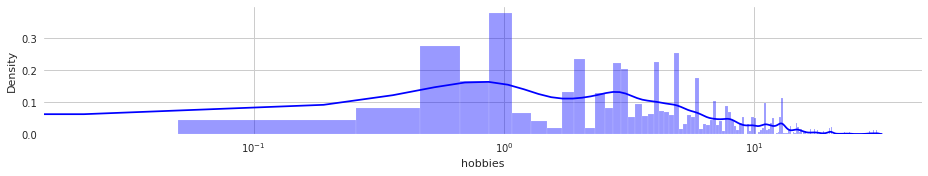

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning:

invalid value encountered in true_divide



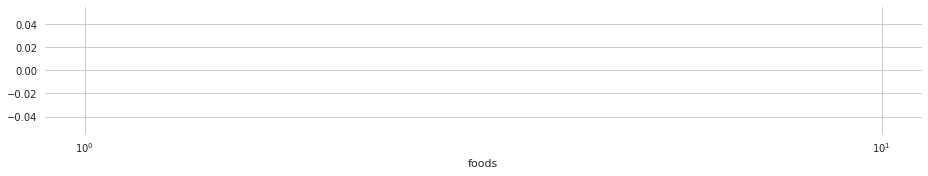

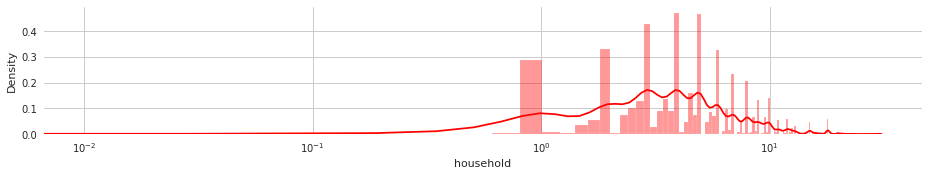

In [17]:
# making a new column category out of the item_id 
sell_prices_df['category'] = sell_prices_df['item_id'].str.split("_", expand=True)[0]

sns.set_style('whitegrid')
#plt.figure(figsize=(15,5))

def kde_plotting(df, category, bin_size, color, label):
    
    '''
    plots the kde density plot of the continuous features of df specified
    
    inputs: df, category(whether, foods, household or hobbies), bin_size(bin size for histogram)
            color (color of the plot), label (label to the plot)
    returns: kde plots with logarithmic scale taken on x_axis
            
    '''
    fig, ax1 = plt.subplots(figsize=(13, 2.5) )

    sns.distplot(df[df['category'] == category]['sell_price'], 
               axlabel = label ,bins=bin_size, color = color, ax=ax1) 

    fig.tight_layout()
    ax1.set_xscale('log')
    plt.legend()
    plt.show()
    
kde_plotting(sell_prices_df, 'HOBBIES', 150, 'b', 'hobbies')   
kde_plotting(sell_prices_df, 'FOODS', 250, 'g', 'foods') 
kde_plotting(sell_prices_df, 'HOUSEHOLD', 150, 'r', 'household') 

## Loại bỏ các yếu tố ngoại lai để quan sát phân phối giá

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



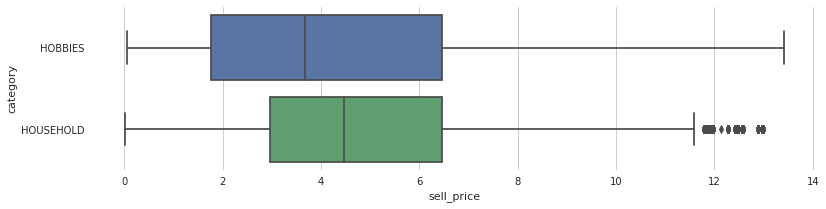

In [18]:
# Quartile Method
def remove_outliers(df):
    
    '''
    removes the outliers in continous features using quartile ranges
    
    inputs: df(df specified with continous features along side categorical features)
    returns: df with removed outliers
    '''
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    
    return df_final

df = sell_prices_df[['category', 'sell_price']]
df = remove_outliers(df)

sns.set_style('whitegrid')
sns.axes_style(style='ticks')
plt.figure(figsize=(13,3))
sns.boxplot(y=df['category'], x=df['sell_price'])
plt.show()

## Phân phối doanh số vào các ngày trong tuần và các dịp đặc biệt

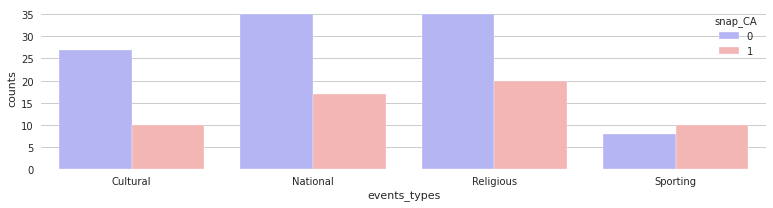

In [19]:
#Making in and including a new entry of days as well as merging the events_1 and event_2 into
# a single new events_names and types category

calendar_df['days'] = [d.split('-')[2] for d in calendar_df['date']]
calendar_df['events_names'] = pd.concat([calendar_df['event_name_1'], calendar_df['event_name_2']], 
                                        ignore_index=True)
calendar_df['events_types'] = pd.concat([calendar_df['event_type_1'], calendar_df['event_type_2']], 
                                        ignore_index=True)
#calendar_df.drop(['event_name_1', 'event_name_2', 'event_type_1', 'event_type_2'], axis=1, inplace=True)

### SNAP_CA, SNAP_TX, SNAP_WI

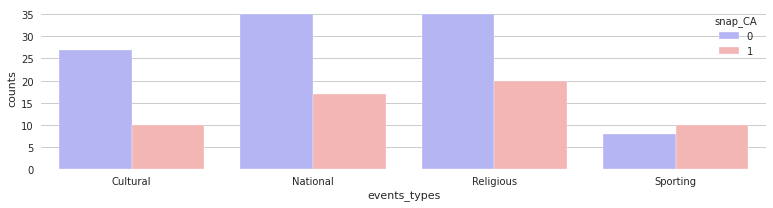

In [20]:
df = calendar_df.groupby(['events_types'])['snap_CA'].value_counts().reset_index(name='counts')

sns.set_style('whitegrid')
sns.axes_style(style='ticks')
plt.figure(figsize=(13,3))
sns.barplot(x = 'events_types', y='counts', hue='snap_CA', data=df, palette='bwr')
plt.show()

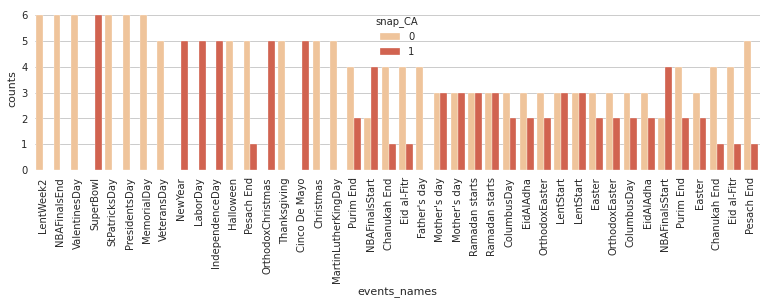

In [37]:
sns.set_style('whitegrid')
sns.axes_style(style='ticks')
plt.figure(figsize=(13,3))
sns.barplot(x = 'events_names', y='counts', hue='snap_CA', data=df, 
            order = df.sort_values(['counts'], ascending=False).events_names, 
            palette='OrRd')
plt.xticks(rotation=90)
plt.show()

## Phân phối các mặt hàng bán hàng so với doanh thu bán hàng

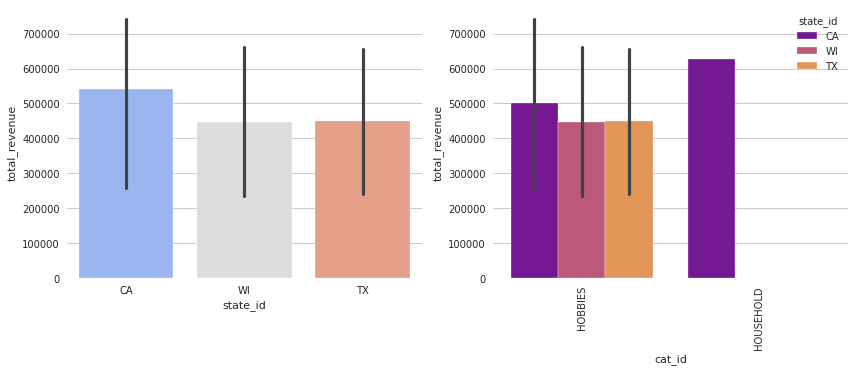

In [21]:
train_sales_prices_df = train_sales_df.merge(sell_prices_df, how='inner', on='item_id')
df = train_sales_prices_df.groupby(['cat_id', 'state_id', 'store_id_x'])['sell_price'].sum().reset_index(name='total_revenue')
df = df.sort_values(by='total_revenue', ascending=False)

sns.set_style('whitegrid')
sns.axes_style(style='ticks')
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

sns.barplot(x = 'state_id', y='total_revenue', data=df, 
            palette='coolwarm', ax=ax1)
sns.barplot(x = 'cat_id', y='total_revenue', hue='state_id', data=df, 
            palette='plasma', ax=ax2)

plt.xticks(rotation=90)
plt.show()

## Phân phối Tổng doanh số so với sản phẩm theo thời gian

In [22]:
train_sales_cal_df = train_sales_df.set_index('id')[d_cols].T.merge(calendar_df.set_index('d')['date'], 
                                                                    left_index=True, right_index=True,
                                                                    validate="1:1").set_index('date')
train_sales_cal_df['total_sales'] = train_sales_cal_df.sum(axis=1)

train_sales_cal_df = train_sales_cal_df[['total_sales']]
train_sales_cal_df = train_sales_cal_df.reset_index()

fig = px.line(train_sales_cal_df, x='date', y="total_sales", 
             template = 'plotly_white', title = 'Total Sales by Product id', 
             width=800, height=450)

fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(
    xaxis=dict(
    rangeselector=dict( buttons=list([ dict(count=1, label="1m", step="month", stepmode="backward"),
    dict(count=6,label="6m", step="month", stepmode="backward"),
    dict(count=1, label="YTD", step="year", stepmode="todate"),
    dict(count=1, label="1y", step="year", stepmode="backward"),
    dict(step="all")
            ]) 
                      ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

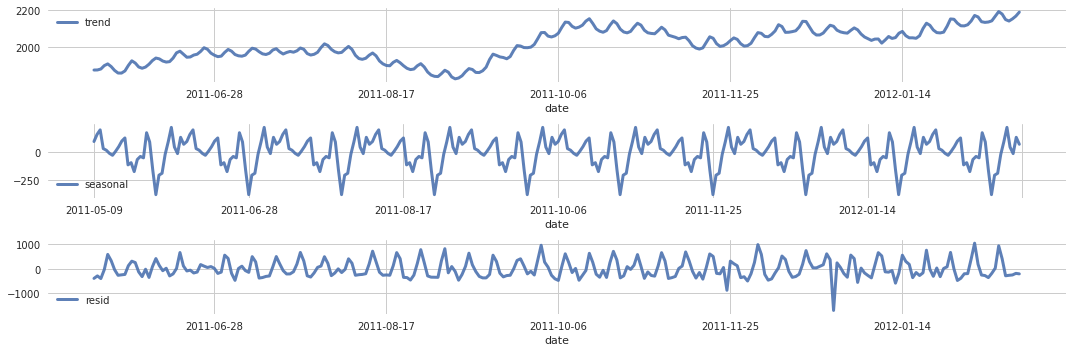

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

def time_series_decompose(df, model_specified, period):

    '''
    returns decomposed time series components (with seasonality, trend and residuals ) of time_series df
    
    inputs: df(time series df), model_specified (whether additive or multiplicative ), period(number of days)
    returns: trend values, seasonality values and residual values of time_series df
    
    '''
    df_decomposition = seasonal_decompose(
                               x=df.set_index(['date']), 
                               model= model_specified, 
                               period=period)
    
    est_trend = df_decomposition.trend
    est_trend = est_trend.reset_index(name='trend').set_index('date')
    est_seasonal = df_decomposition.seasonal
    est_seasonal = est_seasonal.reset_index(name='seasonal').set_index('date')
    est_residual = df_decomposition.resid
    est_residual = est_residual.reset_index(name='resid').set_index('date')
    
    return est_trend, est_seasonal, est_residual

sample_time_s1 = train_sales_cal_df[100:400]
est_trend, est_seasonal, est_residual = time_series_decompose(sample_time_s1, 
                                                              'additive', 30)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 7))

est_trend.plot(figsize=(15, 5) ,
                 alpha=0.9, 
                 lw=3, ax = ax1)
est_seasonal.plot(figsize=(15, 5) ,
                 alpha=0.9, 
                 lw=3, ax = ax2)
est_residual.plot(figsize=(15, 5) ,
                 alpha=0.9, 
                 lw=3, ax = ax3)

fig.tight_layout()
plt.show()

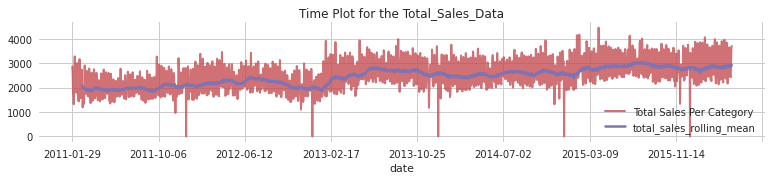

In [25]:
train_sales_cal_df = train_sales_cal_df.set_index('date')

def time_and_rolling_plot(df, title_text, rolling_days=30, height=2.2):

    '''
    plots the time_series of dailysales made along with rolling mean plot
    
    inputs: df, title_text(plot title), rolling_days (rolling mean to be taken across), 
            height(height of the plot to be specified)
            
    returns: time series plot and rolling mean plot of the variable specified 
    '''
    sns.set_style('whitegrid')
    fig, ax1 = plt.subplots(1, 1, figsize=(13, height))
    df.plot(figsize=(13, height),
                        alpha=0.8,
                        title="Time Plot for the " + str(title_text), 
                        lw=2, color=next(color_cycle), ax=ax1)
    df.rolling(rolling_days).mean().plot(figsize=(13, height),
                                          alpha=1, 
                                          legend="Rolling Mean on 30 days", 
                                          lw=2.5, color=next(color_cycle), ax=ax1)
    ax1.legend(['Total Sales Per Category', 'total_sales_rolling_mean'])
    plt.show()

time_and_rolling_plot(train_sales_cal_df, 'Total_Sales_Data')

## Tìm sản phẩm của 25 đơn vị bán được nhiều nhất

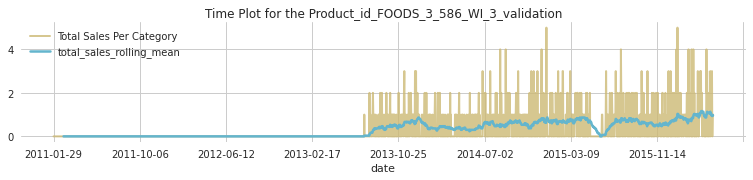

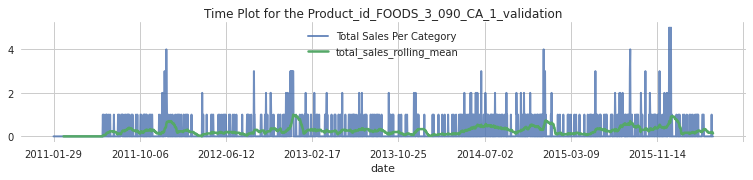

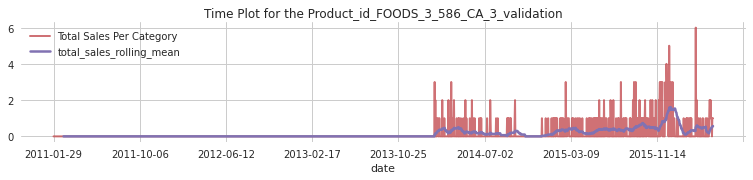

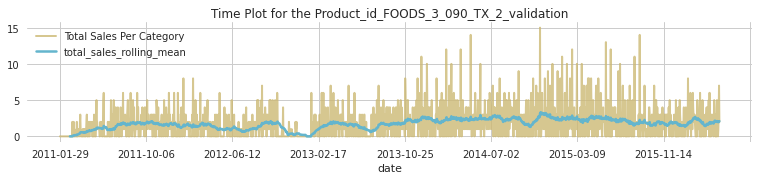

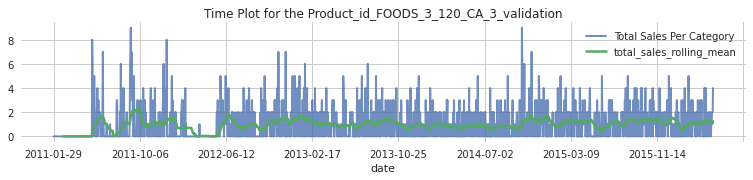

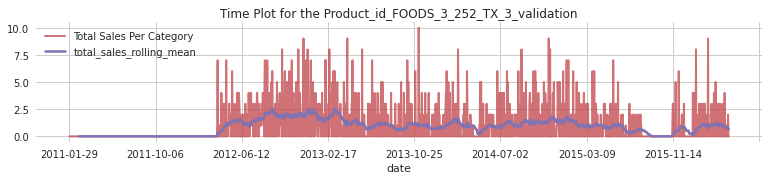

In [26]:
#finding the product_ids of 25 most sold units
train_sales_most_sold_25 = train_sales_df.groupby(['id'])['total_sales_all_days'].sum().sort_values(ascending=False)[:25]
train_sales_most_sold_25 = train_sales_most_sold_25.reset_index(name='total_sales')
train_sales_most_sold_25.iloc[0:5]

train_sales_cal_df = train_sales_df.set_index('id')[d_cols].T.merge(calendar_df.set_index('d')['date'], 
                                                                    left_index=True, right_index=True,
                                                                    validate="1:1").set_index('date')

time_and_rolling_plot(train_sales_cal_df[['HOBBIES_1_001_CA_1_validation']], "Product_id_FOODS_3_586_WI_3_validation")
time_and_rolling_plot(train_sales_cal_df[['HOBBIES_1_002_CA_1_validation']], "Product_id_FOODS_3_090_CA_1_validation")
time_and_rolling_plot(train_sales_cal_df[['HOBBIES_1_003_CA_1_validation']], "Product_id_FOODS_3_586_CA_3_validation")
time_and_rolling_plot(train_sales_cal_df[['HOBBIES_1_004_CA_1_validation']], "Product_id_FOODS_3_090_TX_2_validation")
time_and_rolling_plot(train_sales_cal_df[['HOBBIES_1_005_CA_1_validation']], "Product_id_FOODS_3_120_CA_3_validation")
time_and_rolling_plot(train_sales_cal_df[['HOBBIES_1_006_CA_1_validation']], "Product_id_FOODS_3_252_TX_3_validation")

In [53]:
calendar_df.set_index('d')['date']

d
d_1       2011-01-29
d_2       2011-01-30
d_3       2011-01-31
d_4       2011-02-01
d_5       2011-02-02
             ...    
d_1965    2016-06-15
d_1966    2016-06-16
d_1967    2016-06-17
d_1968    2016-06-18
d_1969    2016-06-19
Name: date, Length: 1969, dtype: object

## Phân bổ tổng doanh số bán hàng theo từng loại

In [59]:
train_sales_cal_df = train_sales_df.groupby(['cat_id'])[d_cols].sum(numeric_only=True, min_count=0).T.merge(calendar_df.set_index('d')['date'],left_index=True, right_index=True,validate="1:1").set_index('date')

def plotly_time_plot_markers(df, text, samples_onwards=1000):

    '''
    plots time_series plotly scatter plot of the format specified in df 
    
    inputs: df(dataframe), text(title text ), samples_onwards (time_series_sample and the end)
    returns : plotly time series scatter plot
    
    '''
    fig = go.Figure()
    for c in df.columns[:4]:
        fig.add_traces(go.Scatter(x=train_sales_cal_df[samples_onwards:].index, 
                              y=train_sales_cal_df[samples_onwards:][c],
                              mode='markers',
                              name = c))

    fig.update_layout( title = 'Sales per Day by ' + str(text), template = 'plotly_white',
        width=750, height=550,
        xaxis_tickformatstops = [
            dict(dtickrange=["M1", "M12"], value="%b '%y"),
        ]
    )
    
    fig.update_layout(
    xaxis=dict(
    rangeselector=dict( buttons=list([ dict(count=1, label="1m", step="month", stepmode="backward"),
    dict(count=6,label="6m", step="month", stepmode="backward"),
    dict(count=1, label="YTD", step="year", stepmode="todate"),
    dict(count=1, label="1y", step="year", stepmode="backward"),
    dict(step="all") ])  ),
        rangeslider=dict(
            visible=True
        ),
        type="date" ) )

    fig.update_xaxes(rangeslider_visible=True)    
    fig.show()    

plotly_time_plot_markers(train_sales_cal_df, 'Category')  

## Phân phối tổng doanh số đã bán cho mỗi tiểu bang

In [60]:
from plotly.subplots import make_subplots

def plotly_time_plot_rolling(df, text, start_col=0, end_col=3, rolling_days=30):

    '''
    time series rolling plots of the categories specified in df
    inputs: df (dataframe with ts as index, and columns as categories), text (title of the plot)
            rolling_days (number of rolling days)
    
    returns: plotly time series plot of sales along the categories specified as columns in df
    '''
    fig = go.Figure()
    for c in df.columns[start_col:end_col]:
        fig.add_traces(go.Scatter(x=df.rolling(rolling_days).mean().index, 
                              y=df.rolling(rolling_days).mean()[c],
                              mode='lines+markers',
                              name = c))

    fig.update_layout( title = 'Sales per Day by ' + str(text), template = 'plotly_white',
        width=750, height=550,
        xaxis_tickformatstops = [
            dict(dtickrange=["M1", "M12"], value="%b '%y"),
        ]
    )
    
    fig.update_layout(
    xaxis=dict(
    rangeselector=dict( buttons=list([ dict(count=1, label="1m", step="month", stepmode="backward"),
    dict(count=6,label="6m", step="month", stepmode="backward"),
    dict(count=1, label="YTD", step="year", stepmode="todate"),
    dict(count=1, label="1y", step="year", stepmode="backward"),
    dict(step="all") ])  ),
        rangeslider=dict(
            visible=True
        ),
        type="date" ) )

    fig.update_xaxes(rangeslider_visible=True)    
    fig.show()   

plotly_time_plot_rolling(train_sales_cal_df, 'State')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:9138: FutureWarning:

merging between different levels is deprecated and will be removed in a future version. (2 levels on the left,1 on the right)



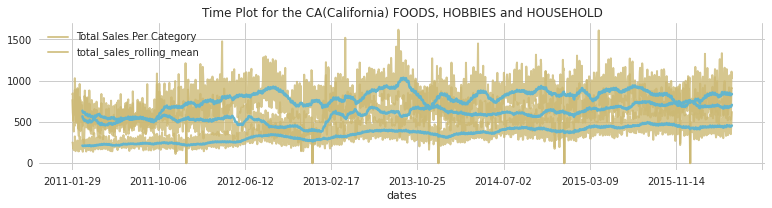

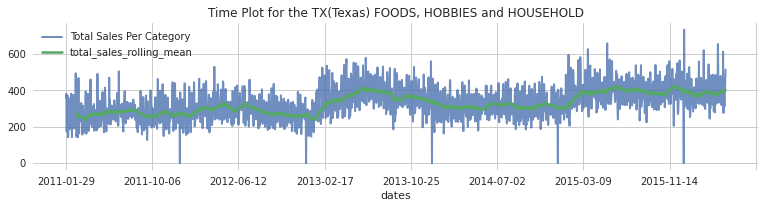

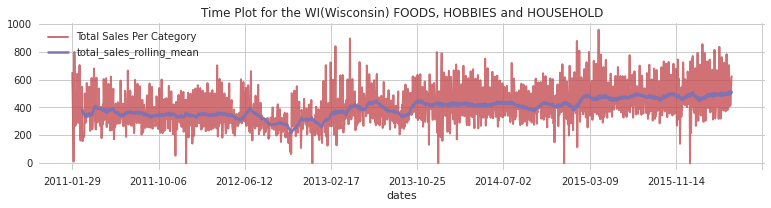

In [63]:
#referring to the solution provided at https://stackoverflow.com/questions/43223615/join-dataframes-one-with-multiindex-columns-and-the-other-without

train_sales_cal_df = train_sales_df.groupby(['state_id', 'cat_id'])[d_cols].sum(numeric_only=True, min_count=0).T.join(pd.concat([calendar_df.set_index('d')['date']], axis=1, keys=['dates']))
train_sales_cal_df.head(2)

select_cols_ca = [c for c in train_sales_cal_df.columns if 'CA' in c]
select_cols_tx = [c for c in train_sales_cal_df.columns if 'TX' in c]
select_cols_wi = [c for c in train_sales_cal_df.columns if 'WI' in c]
#train_sales_df['total_sales_all_days'] = train_sales_df[d_cols].sum(axis = 1)
#train_sales_cal_df = 
df_CA = train_sales_cal_df.set_index('dates')[select_cols_ca]
df_TX = train_sales_cal_df.set_index('dates')[select_cols_tx]
df_WI = train_sales_cal_df.set_index('dates')[select_cols_wi]

#df_CA.columns = [col[1] for col in df_CA.columns]
#df_TX.columns = [col[1] for col in df_TX.columns]
#df_WI.columns = [col[1] for col in df_WI.columns]

time_and_rolling_plot(df_CA, 'CA(California) FOODS, HOBBIES and HOUSEHOLD', height=2.7)
time_and_rolling_plot(df_TX, 'TX(Texas) FOODS, HOBBIES and HOUSEHOLD', height=2.7)
time_and_rolling_plot(df_WI, 'WI(Wisconsin) FOODS, HOBBIES and HOUSEHOLD', height=2.7)
#time_and_rolling_plot(df_CA.iloc[:,1].reset_index(), "CA HOBBIES")
#time_and_rolling_plot(df_CA.iloc[:,2].reset_index(), "CA State")

## Phân phối Tổng doanh số với cửa hàng

In [65]:
train_sales_cal_df = train_sales_df.groupby(['store_id'])[d_cols].sum(numeric_only=True, min_count=0).T.merge(calendar_df.set_index('d')['date'], 
                                                        left_index=True, right_index=True,
                                                        validate="1:1").set_index('date')

#PLOT one by one to avoid memory overload

#plotly_time_plot_rolling(train_sales_cal_df, 'Store')
plotly_time_plot_rolling(train_sales_cal_df, 'Store', start_col=4, end_col=7)
#plotly_time_plot_rolling(train_sales_cal_df, 'Store', start_col=7, end_col=10)

## Phân bổ doanh số bán hàng theo các ngày đặc biệt và cuối tuần

In [67]:
train_sales_cal_df = train_sales_df.groupby(['cat_id'])[d_cols].sum(numeric_only=True, min_count=0).T.merge(calendar_df.set_index('d')['date'], 
                                                                    left_index=True, right_index=True,
                                                                    validate="1:1").set_index('date')

train_sales_cal_df = train_sales_cal_df.reset_index()
train_sales_cal_df['date'] = pd.to_datetime(train_sales_cal_df['date'])
train_sales_cal_df['month'] = train_sales_cal_df.date.dt.month
train_sales_cal_df['day'] = train_sales_cal_df.date.dt.day
train_sales_cal_df['year'] = train_sales_cal_df.date.dt.year
train_sales_cal_df['weekday'] = train_sales_cal_df.date.dt.weekday
train_sales_cal_df['weekday'] = train_sales_cal_df.date.dt.day_name()

df_food = train_sales_cal_df.groupby(['weekday', 'day'])['FOODS'].sum().reset_index(name='sales')
df_house = train_sales_cal_df.groupby(['weekday', 'day'])['HOUSEHOLD'].sum().reset_index(name='sales')
df_hob = train_sales_cal_df.groupby(['weekday', 'day'])['HOBBIES'].sum().reset_index(name='sales')

def heatmap_plot_dates(df, title_text):

    '''
    returns the heatmap based plot for the df with time_series data in it
    
    inputs : df (dataframe with time based elements, such as weekdays, months etc.)
             title_text (text of the plot to be shown)
    returns : Heatmaps of Weekdays along number of days of a months
    '''
    fig = make_subplots(rows=1, cols=1, vertical_spacing = 0.15, 
                    subplot_titles=title_text,
                    shared_yaxes = True
                   )
    fig.add_trace( go.Heatmap(
                   z=[[df.loc[(df['day'] == day) & (df['weekday'] == weekday)]['sales'].sum()
                     for day in range(1, 31+1)] for weekday in df.weekday.unique()],
                   x=list(df.day.unique()),
                   y=list(df.weekday.unique()),
                   hoverongaps = False, 
                   colorbar = dict(title= title_text + '_Sales', 
                                   thickness=15)), row=1, col=1)
    fig.update_layout(title = title_text + '_Sale Distribution', height=2 * 20 + 300, width=1 * 700, showlegend=False)
    fig.show()

heatmap_plot_dates(df_food, 'FOODS')
heatmap_plot_dates(df_hob, 'HOBBIES')
heatmap_plot_dates(df_house, 'HOUSEHOLD')

# Time Series Forecasting

In [113]:
train_sales_df = pd.read_csv('https://cdn.smas.edu.vn/Assets/M5/Full/kaggle/input/m5-forecasting-accuracy/sales_train_validation.csv')

## Chuỗi thời gian tĩnh

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



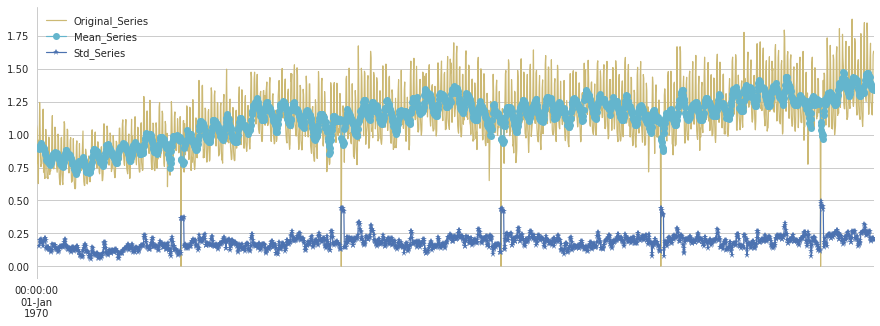


============++++==========

Results of the Dickey_Fuller Test
ADF Statistic: -1.565373
No of lags: 26.000000
No of Obs used for ADF Calculation & Critical Values: 1886.000000
p-value: 0.500960
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [124]:
train_sales_cal_df = train_sales_df.set_index('id')[d_cols].T.merge(calendar_df.set_index('d')['date'], 
                                                                    left_index=True, right_index=True,
                                                                    validate="1:1").dropna()
train_sales_cal_df['avg_sales'] = train_sales_cal_df.mean(axis=1)

train_sales_cal_df = train_sales_cal_df.reset_index()
train_sales_cal_df.rename(columns={'index': 'daysnum'}, inplace=True)
#train_sales_cal_df = train_sales_cal_df.set_index('date').asfreq('d')

train_sales_cal_df.index = pd.to_datetime(train_sales_cal_df.index)


def time_series_stationary_test(df):
    
    '''
    returns time_series plots along with rolling mean plot, standard_dev calculated plot
    and results of the Dickey_Fuller Test performed on time_series df
    
    inputs: df (time_series based df)
    
    returns : time_series plot, rolling_mean plot, std_plot and Dickey_Fuller Test Statistics
              performed on time_series
    '''
    #df_filter = df.loc[df['id'] == series_ids][d_cols]
    #df_filter = df.loc[df['id'] == series_ids]['sold']
    #df_filter = pd.Series(df_filter.values.flatten())
    
    sns.set_style("whitegrid")
    fig, ax1 = plt.subplots(1, 1, figsize=(15, 5))
    
    rolling_mean = df.rolling(window=7).mean()
    rolling_std =  df.rolling(window=7).std()
    
    #plotting the points
    original_series = df.plot(figsize=(15, 5), alpha=1, 
                        lw=1.2, color=next(color_cycle), label='original_series', ax=ax1)
    mean_series = rolling_mean.plot(figsize=(15, 5), alpha=1, 
                        lw=1.2, marker = 'o', color=next(color_cycle), label='rolling_mean', ax=ax1)
    std_series = rolling_std.plot(figsize=(15, 5), alpha=1, 
                        lw=1.2, marker = '*' , color=next(color_cycle), label='rolling_std', ax=ax1)
    
    ax1.legend(['Original_Series', 'Mean_Series', "Std_Series"])
    plt.show()
    
    #Performing a Dickey-Fuller Test
    print("\n============++++==========\n")
    print("Results of the Dickey_Fuller Test")
    result = adfuller(df, autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('No of lags: %f' %result[2])
    print('No of Obs used for ADF Calculation & Critical Values: %f' %result[3])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    #output = pd.Series(result[0:4], index=['ADF Statistic','p-value','#Lags Used','Number of Observations Used'])
    #for key,value in result[4].items():
    #    output['Critical Value (%s)'%key] = value
    #print (output)

time_series_stationary_test(train_sales_cal_df[['avg_sales']])

## Phương pháp tạo chuỗi thời gian tĩnh

### Differencing

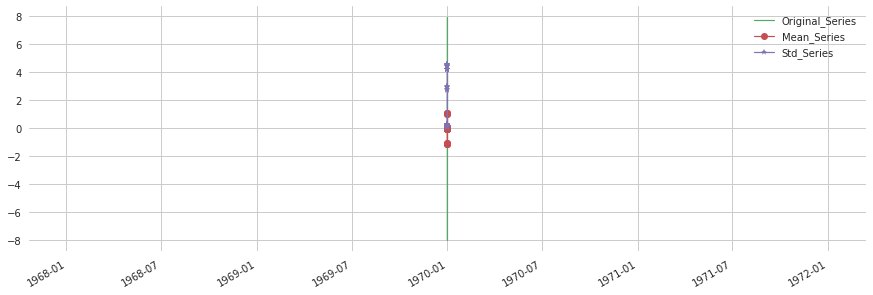


============++++==========

Results of the Dickey_Fuller Test
ADF Statistic: -16.908187
No of lags: 26.000000
No of Obs used for ADF Calculation & Critical Values: 1885.000000
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [125]:
df_log_diff = np.log(train_sales_cal_df[['avg_sales']]) - np.log(train_sales_cal_df[['avg_sales']]).shift()
#df['sold'] = df_log_diff
#df['sold'] = df['sold'].dropna()
df_log_diff = df_log_diff.dropna()

time_series_stationary_test(df_log_diff)

### Decomposition

In [126]:
from statsmodels.tsa.seasonal import seasonal_decompose

def time_series_decompose(df, model_specified, period):
    
    '''
    returns the trend, seasonality, and residual components decomposition of time_Series and
    plots the results 
    
    inputs: df(time_series df along with sales specified), model_specified (whether to use
            additive or multiplicative), period (number of days where seasonality 
            is to be observed)
    returns: decomposition plots along with decomposition components, in trend, seasonality
    and residuals
    '''

    df_decomposition = seasonal_decompose(
                               x=df, 
                               model= model_specified, 
                               period=period)
    
    est_trend = df_decomposition.trend
    est_trend = est_trend.reset_index(name='trend').set_index('date')
    est_seasonal = df_decomposition.seasonal
    est_seasonal = est_seasonal.reset_index(name='seasonal').set_index('date')
    est_residual = df_decomposition.resid
    est_residual = est_residual.reset_index(name='resid').set_index('date')
    
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 24))

    df.plot(figsize=(14, 8) ,
                 alpha=0.8, 
                 lw=1.5, ax = ax1)
    est_trend.plot(figsize=(14, 8) ,
                 alpha=0.8, 
                 lw=1.5, ax = ax2)
    est_seasonal.plot(figsize=(14, 8) ,
                 alpha=0.8, 
                 lw=1.5, ax = ax3)
    est_residual.plot(figsize=(14, 8) ,
                 alpha=0.6, 
                 lw=3, style = 'o', ax = ax4)

    fig.tight_layout()
    plt.show()
    
    return est_trend, est_seasonal, est_residual

#sample_time_s1 = train_sales_cal_df[400:700]
#est_trend, est_seasonal, est_residual = time_series_decompose(sample_time_s1, 'multiplicative', 15)

In [129]:
#trend_comp, seas_comp, residual_comp = time_series_decompose(train_sales_cal_df[['avg_sales']], 'multiplicative', 30)

# SARIMAX

In [130]:
df_log_diff = np.log(train_sales_cal_df['avg_sales']) - np.log(train_sales_cal_df['avg_sales']).shift()
df_log_diff = df_log_diff.dropna()

## ACF & PACF: Tìm Pdq trực quan

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:662: FutureWarning:

The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:671: FutureWarning:

fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning:

In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning:

In Matplotlib 3.3 individual lines on a stem plot will be adde

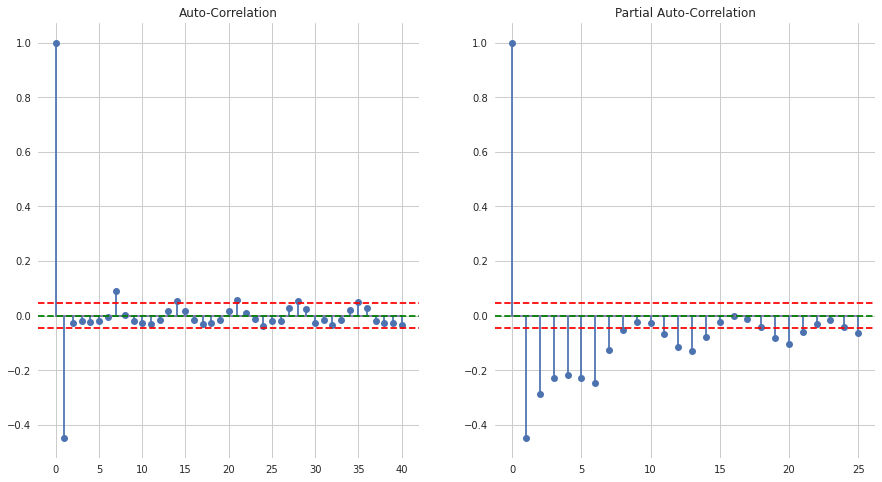

In [131]:
from statsmodels.tsa.stattools import acf, pacf

def auto_par_corr(ts_stat, nlags=25): 

    '''
    returns the ACF and PACF plots of the time series
    
    inputs: ts_stat (time series along with data), nlags (optimal number of lags)
    
    returns: plot of ACF and PACF
    '''
    lag_acf = acf(ts_stat, nlags)
    lag_pacf = pacf(ts_stat, nlags, method='ols')
    
    sns.set_style("whitegrid")

    
    plt.figure(figsize=(15, 8))
    plt.subplot(121)
    #plt.plot(lag_acf)
    plt.stem(lag_acf)
    plt.axhline(y=0,linestyle='--',color='g')
    plt.axhline(y=-1.96/np.sqrt(len(ts_stat)), linestyle='--',color='r')
    plt.axhline(y=1.96/np.sqrt(len(ts_stat)), linestyle='--',color='r')
    plt.title('Auto-Correlation')
    
    #lag_pacf.plot(figsize=(15, 5), alpha=1, 
    #                    lw=3, color=next(color_cycle), label='par_corr', ax=ax2)
    plt.subplot(122)
    #plt.plot(lag_pacf)
    plt.stem(lag_pacf)
    plt.axhline(y=0,linestyle='--',color='g')
    plt.axhline(y=-1.96/np.sqrt(len(ts_stat)), linestyle='--',color='r')
    plt.axhline(y=1.96/np.sqrt(len(ts_stat)), linestyle='--',color='r')
    plt.title('Partial Auto-Correlation')
    
    plt.legend()
    plt.show()
auto_par_corr(df_log_diff, nlags=25)

In [132]:
#Let us split the time series into training and testing sets
#perc_training = 0.7
#split_p = round(len(train_sales_cal_df['avg_sales']) * perc_training)
#training_p, testing_p = train_sales_cal_df['avg_sales'][0:split_p], train_sales_cal_df['avg_sales'][split_p:]

training_p = train_sales_cal_df.loc[:'2015-10-14', ['avg_sales']]
testing_p = train_sales_cal_df.loc['2015-10-15':, ['avg_sales']]
training_p.head(2)

,avg_sales
1970-01-01 00:00:00.000000000,1.070220
1970-01-01 00:00:00.000000001,1.041292


## Tạo ra các yếu tố không đồng nhất

In [133]:
#for prophet model:
df_event_1 = pd.DataFrame({'holiday': 'Event 1', 'ds': calendar_df[~calendar_df['event_name_1'].isna()]['date']})
df_event_2 = pd.DataFrame({'holiday': 'Event 2', 'ds': calendar_df[~calendar_df['event_name_2'].isna()]['date']})
df_snapca = pd.DataFrame({'holiday': 'snap_CA', 'ds': calendar_df[calendar_df['snap_CA'] == 1]['date']})
df_snaptx = pd.DataFrame({'holiday': 'snap_TX', 'ds': calendar_df[calendar_df['snap_TX'] == 1]['date']})
df_snapwi = pd.DataFrame({'holiday': 'snap_WI', 'ds': calendar_df[calendar_df['snap_WI'] == 1]['date']})
holidays = pd.concat((df_event_1, df_event_2, df_snapca, df_snaptx, df_snapwi))

,holiday,ds
8,Event 1,2011-02-06
16,Event 1,2011-02-14
23,Event 1,2011-02-21


In [134]:
#ever since spliting exo, it is to be added additionally
holidays['ds'] = pd.to_datetime(holidays['ds'])

In [135]:
# for SARIMAX Model:

data = {'date':train_sales_cal_df.index,
        'holidays': 0 }

exo = pd.DataFrame(data)

for idx, date1 in enumerate(exo['date']):
    for date2 in holidays['ds']:
        if date2 == date1:
            exo['holidays'].iloc[idx] = 1
        else:
            continue       

In [136]:
exo = exo.set_index(['date']).asfreq('D')
exo.head(4)

,holidays
date,
1970-01-01,0


In [137]:
exo_train = exo.loc[:'2015-10-14']
exo_test = exo.loc['2015-10-15':]

In [138]:
def SARIMAX_tune(ts, total_params):

    '''
    returns the optimal tuned results using AIC as a prediction accuracy metric
    
    inputs : ts (time series), total_params (SARIMAX models parameters to be specified)
    
    returns: results of SARIMAX tuned model
    '''
    results = []

    for param in total_params:
        try:
            model = SARIMAX(ts, exog = exo, order=param[0], seasonal_order=param[1], 
                           initialization='approximate_diffuse')
            res = model.fit(method='powell')
            results.append((res, res.aic, res.params))
            print("The results of SARIMAX{}x{} in AIC are: {}".format(param[0], param[1], res.aic))
        except Exception as e:
            print(e)
            continue
    
    return results

In [139]:
###########New Code#############
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV

def SARIMAX_tune_with_RMSE(ts, total_params):
    
    '''
    returns the optimal tuned results using RMSE as a prediction error metric
    
    inputs : ts (time series), total_params (SARIMAX models parameters to be specified)
    
    returns: results of SARIMAX tuned model with RMSE as the error metric
    '''
    tscv = TimeSeriesSplit(n_splits = 5)
    rmse_array = []
    timeseries = ts #train_sales_cal_df[['avg_sales']]
    results = []
    
    for train_index, test_index in tscv.split(timeseries):
        cv_train, cv_test = timeseries.iloc[train_index], timeseries.iloc[test_index]
        
        for param in total_params:
            try:
                model = SARIMAX(cv_train, order=param[0], seasonal_order=param[1], 
                               initialization='approximate_diffuse')
                res = model.fit(method="powell")
                results.append((res, res.params))
                #use this statement for further troubleshooting on mle #print("MLE retvals for this iter are: {}".format(res.mle_retvals))
                #print("The results of SARIMAX{}x{} in are: {}".format(param[0], param[1]))
            except Exception as e:
                print(e)
                continue

            sarimax = model.fit(disp=0)
            predictions = sarimax.predict(cv_test.index.values[0], cv_test.index.values[-1])
            true_values = cv_test.values
            #true_values = cv_test
            #wrmse_array.append(wrmse(true_values, predictions))
            #rmse_array.append(np.sqrt(mean_squared_error(true_values, predictions)))
            print("Results of SARIMAX in {} x {} in RMSE: {}".format(param[0], param[1], 
                                                                 np.sqrt(mean_squared_error(true_values, predictions))))
        
        return results

## Kiểm tra lại SARIMAX

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency N will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency N will be used.



                                     SARIMAX Results                                     
Dep. Variable:                         avg_sales   No. Observations:                 1913
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 7)   Log Likelihood                1580.609
Date:                           Sun, 23 Oct 2022   AIC                          -3147.218
Time:                                   16:23:39   BIC                          -3108.412
Sample:                               01-01-1970   HQIC                         -3132.928
                                    - 01-01-1970                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3525      0.013     26.472      0.000       0.326       0.379
ar.L2          0.1161      0.022      5.237

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/mlemodel.py:4294: UserWarning:

Attempting to set identical left == right == 719163.0 results in singular transformations; automatically expanding.



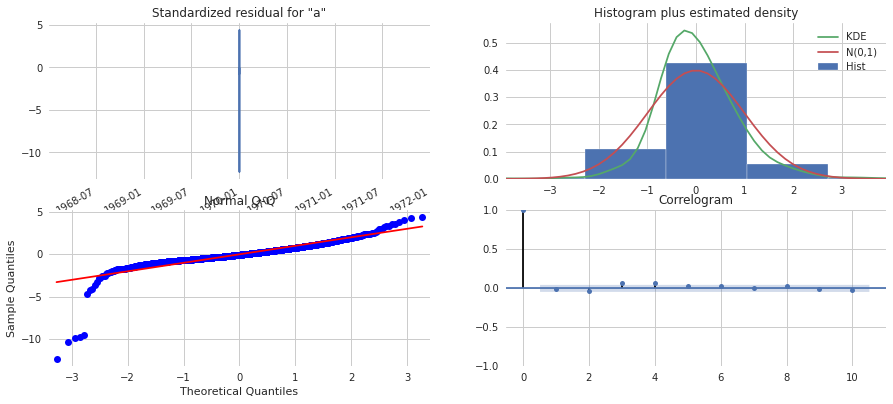

In [140]:
p, d, q =range(1,3), [1], range(1,3)
P, D, Q, S =range(0,3), [1], range(1,3), [7]
pdq = list(itertools.product(p,d,q))
seasonal_pdq = list(itertools.product(P,D,Q,S))
total_params = list(itertools.product(pdq, seasonal_pdq))

#NOTE: memory intensive operation if range set at 0,3, readings have already been taken by running it once:
#all_results = SARIMAX_tune(train_sales_cal_df['avg_sales'], total_params)
#all_results = SARIMAX_tune_with_RMSE(train_sales_cal_df[['avg_sales']], total_params)

#More information regarding fixng the error nle_retvals can be found at:
#https://stats.stackexchange.com/questions/313426/mle-convergence-errors-with-statespace-sarimax

#Fitting in the SARIMAX Model
#include the exo_train in here , exo_test in prediction (model_fit_SARIMAX) to check results: for now, abandoning their use because
# of the error in package, since even converting exo_train, exo_test into time series/using df results
# in errors. 
#model values earlier 1,1,1, 0,1,1,7 
#values with RMSE - order=(2,1,1), seasonal_order=(2,1,1,7), 
model = SARIMAX(training_p,
                order=(2,1,1), seasonal_order=(2,1,1,7), 
                enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit(disp=0)
print(model_fit.summary())
model_fit.plot_diagnostics(figsize=(15,7))
plt.show()
#information on whether particular model is a goodfit
#https://analyticsindiamag.com/complete-guide-to-sarimax-in-python-for-time-series-modeling/

## SARIMAX kiểm tra đồ họa và dự báo

## Phép tính WRMSSE

In [145]:
submission_file = pd.read_csv('https://cdn.smas.edu.vn/Assets/M5/Resized/kaggle/input/m5-forecasting-accuracy/sample_submission.csv')

In [143]:
# Memory reduction helper function:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns: #columns
        col_type = df[col].dtypes
        if col_type in numerics: #numerics
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

calendar_df = reduce_mem_usage(calendar_df)

sell_prices_df = reduce_mem_usage(sell_prices_df)

Mem. usage decreased to  0.17 Mb (34.5% reduction)
Mem. usage decreased to  8.08 Mb (30.0% reduction)


In [146]:
from scipy.sparse import csr_matrix
import gc

NUM_ITEMS = train_sales_df.shape[0]  # 30490
DAYS_PRED = submission_file.shape[1] - 1  # 28

# Dataframe with only last 28 days:
sales = train_sales_df
cols = ["d_{}".format(i) for i in range(1914-28, 1914)]
data = sales[["id", 'store_id', 'item_id'] + cols]

# To long form:
data = data.melt(id_vars=["id", 'store_id', 'item_id'], 
                 var_name="d", value_name="sale")

# Add week of year column from 'calendar':
data = pd.merge(data, calendar_df, how = 'left', 
                left_on = ['d'], right_on = ['d'])

data = data[["id", 'store_id', 'item_id', "sale", "d", "wm_yr_wk"]]

# Add weekly price from 'sell_prices':
data = data.merge(sell_prices_df, on = ['store_id', 'item_id', 'wm_yr_wk'], how = 'left')
data.drop(columns = ['wm_yr_wk'], inplace=True)

# Calculate daily sales in USD:
data['sale_usd'] = data['sale'] * data['sell_price']
data.head()

#this part is correct

,id,store_id,item_id,sale,d,sell_price,category,sale_usd
0,HOBBIES_1_001_CA_1_validation,CA_1,HOBBIES_1_001,1,d_1886,8.257812,HOBBIES,8.257812
1,HOBBIES_1_002_CA_1_validation,CA_1,HOBBIES_1_002,1,d_1886,3.970703,HOBBIES,3.970703
2,HOBBIES_1_003_CA_1_validation,CA_1,HOBBIES_1_003,0,d_1886,2.970703,HOBBIES,0.000000
3,HOBBIES_1_004_CA_1_validation,CA_1,HOBBIES_1_004,0,d_1886,4.640625,HOBBIES,0.000000
4,HOBBIES_1_005_CA_1_validation,CA_1,HOBBIES_1_005,1,d_1886,2.880859,HOBBIES,2.880859


In [147]:
# List of categories combinations for aggregations as defined in docs:
dummies_list = [sales.state_id, sales.store_id, 
                sales.cat_id, sales.dept_id, 
                sales.state_id +'_'+ sales.cat_id, sales.state_id +'_'+ sales.dept_id,
                sales.store_id +'_'+ sales.cat_id, sales.store_id +'_'+ sales.dept_id, 
                sales.item_id, sales.state_id +'_'+ sales.item_id, sales.id]


## First element Level_0 aggregation 'all_sales':
dummies_df_list =[pd.DataFrame(np.ones(sales.shape[0]).astype(np.int8), 
                               index=sales.index, columns=['all']).T]

# List of dummy dataframes:
for i, cats in enumerate(dummies_list):
    dummies_df_list +=[pd.get_dummies(cats, drop_first=False, dtype=np.int8).T]
    
# Concat dummy dataframes in one go:
## Level is constructed for free.
roll_mat_df = pd.concat(dummies_df_list, keys=list(range(12)), 
                        names=['level','id'])#.astype(np.int8, copy=False)

# Save values as sparse matrix & save index for future reference:
roll_index = roll_mat_df.index
roll_mat_csr = csr_matrix(roll_mat_df.values)
roll_mat_csr.shape

(42840, 30490)

In [148]:
roll_mat_df.to_pickle('roll_mat_df.pkl')
del dummies_df_list, roll_mat_df
gc.collect()

10719

In [149]:
# Fucntion to calculate S weights:
def get_s(drop_days=0):
    
    """
    drop_days: int, equals 0 by default, so S is calculated on all data.
               If equals 28, last 28 days won't be used in calculating S.
    """
    # Rollup sales:
    d_name = ['d_' + str(i+1) for i in range(1913-drop_days)]
    sales_train_val = roll_mat_csr * sales[d_name].values

    no_sales = np.cumsum(sales_train_val, axis=1) == 0
    sales_train_val = np.where(no_sales, np.nan, sales_train_val)

    # Denominator of RMSSE / RMSSE
    weight1 = np.nanmean(np.diff(sales_train_val,axis=1)**2,axis=1)
    
    return weight1

In [150]:
S = get_s(drop_days=0)
S.shape

(42840,)

In [151]:
# Functinon to calculate weights:
def get_w(sale_usd):
    """
    """
    # Calculate the total sales in USD for each item id:
    total_sales_usd = sale_usd.groupby(
        ['id'], sort=False)['sale_usd'].apply(np.sum).values
    
    # Roll up total sales by ids to higher levels:
    weight2 = roll_mat_csr * total_sales_usd
    
    return 12*weight2/np.sum(weight2)

In [152]:
W = get_w(data[['id','sale_usd']])
W.shape

(42840,)

In [153]:
SW = W/np.sqrt(S)
sw_df = pd.DataFrame(np.stack((S, W, SW), axis=-1),index = roll_index,columns=['s','w','sw'])
sw_df.to_pickle('sw_df.pkl')

In [154]:
# Function to do quick rollups:
def rollup(v):
    '''
    v - np.array of size (30490 rows, n day columns)
    v_rolledup - array of size (n, 42840)
    '''
    return roll_mat_csr*v #(v.T*roll_mat_csr.T).T


# Function to calculate WRMSSE:
def wrmsse(preds, y_true, score_only=False, s = S, w = W, sw=SW):
    '''
    preds - Predictions: pd.DataFrame of size (30490 rows, N day columns)
    y_true - True values: pd.DataFrame of size (30490 rows, N day columns)
    sequence_length - np.array of size (42840,)
    sales_weight - sales weights based on last 28 days: np.array (42840,)
    '''
    
    if score_only:
        return np.sum(
                np.sqrt(
                    np.mean(
                        np.square(rollup(preds.values-y_true.values))
                            ,axis=1)) * sw)/12 #<-used to be mistake here
    else: 
        score_matrix = (np.square(rollup(preds.values-y_true.values)) * np.square(w)[:, None])/ s[:, None]
        score = np.sum(np.sqrt(np.mean(score_matrix,axis=1)))/12 #<-used to be mistake here
        return score, score_matrix

# Mô hình tiên tri chuỗi times

## Fb Prophet: Phân chia dữ liệu đào tạo và xác thực

## Dự báo tiên tri về doanh số bán hàng trung bình bằng Seabor

## Prophet Forecast Using Individual Product IDs

In [157]:
id1 = 'FOODS_3_443_CA_1_validation'
id2 =  'HOUSEHOLD_1_005_CA_3_validation'
id3 =  'FOODS_3_823_WI_3_validation'
id4 = 'FOODS_3_090_CA_3_validation'
id5 = 'FOODS_3_586_TX_2_validation'
id6 = 'FOODS_3_586_TX_3_validation'


In [158]:
def make_id_timeseries(idx, date='2016-02-22'):
    
    '''
    selects and makes the timeseries adjusted for fb prophet model by adjusting names
    of columns
    
    inputs: product_id
    
    returns: time series with data specified in format for prophet
    
    '''
    
    dates_series = [date for date in train_sales_cal_df.index]
    id_series =  train_sales_df[(train_sales_df.id == idx )]
    item_ts = pd.DataFrame({'ds': dates_series}, index=range(len(dates_series)))
    item_ts['y'] = id_series[d_cols].values[0].transpose()
    
    ######Following steps would shorten the behavior of historic timeline data########
    ######Choosing the threshold date near to the date where prediction needs to be made 
    ######because of close correlation in time series
    
    threshold_date = pd.to_datetime(date) 
    mask = item_ts['ds'] > threshold_date

    item_ts = item_ts[mask][['ds', 'y']]
    
    return item_ts

data1 = make_id_timeseries(id6)
data4 = make_id_timeseries(id4)

## Custom Loss Function For Fb Prophet Tuning